# Données météorologiques




Nous allons récupérer les données météorologiques collectées de 2004 à 2022.  Ces données sont accessibles sur le site du gouvernement canadien, climate-change.ca.

Plusieurs options de téléchargement existent.

https://climate-change.canada.ca/climate-data/#/monthly-climate-summaries


<img src='https://drive.google.com/uc?export=view&id=1WDxHrJhq-WwLxAQWQ-YgI0lO7x0E897i' width='450px'>

## Chargement des librairies python

Nous devons d'abord charger (et possiblement installer) les librairies nécessaires.  

Voici une description de certaines des librairies utilisées.

- `matplotlib` et `seaborn` pour générer des graphiques
- `pandas` pour faciliter la manipulation et la structure des données (parfois lent pour les gros jeux de données)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
colors = ["#40BEAD", "#248CC4", "#308E81", "#576AC9"]

## Chargement des fichiers de données météorologiques

Le jeu de données est divisé en plusieurs fichiers .csv.  Il faut concaténer les fichiers en une seule structure de données.

In [3]:
files_ids = ['14Kwr31ujna7JySW0xRTqH-9IrXwizzp9',
             '13hdEOTQkus3Ax6_eoaj5T1f83op3fvp3',
             '18JblSF3YDC1xS-Driw9lYKu84TEAJkXa',
             '1-_YHQ6bBMoI3FDAaSif9AMv_E0xfi4pO']

# Nous allons générer une liste de liens vers les fichiers 
# à partir des identifiants définis plus haut
google_url_format = "https://drive.google.com/uc?export=view&id=%s"
files = [google_url_format % file_id for file_id in files_ids]

In [4]:
# Nous allons lire chacun des fichiers et les concaténer 
# en une seule structure de donneés soit un dataframe
weather = pd.DataFrame()
for myfile in files:
    df = pd.read_csv(myfile)
    weather = pd.concat([weather, df])
    print(F'{myfile}: {df.shape[0]} rows, {df.shape[1]} columns')

# Nous allons convertir la date LOCAL_DATE en format date
weather['LOCAL_DATE'] = pd.to_datetime(weather['LOCAL_DATE'])

# Regardons les 3 premières lignes
weather.head(3)

https://drive.google.com/uc?export=view&id=14Kwr31ujna7JySW0xRTqH-9IrXwizzp9: 10000 rows, 34 columns
https://drive.google.com/uc?export=view&id=13hdEOTQkus3Ax6_eoaj5T1f83op3fvp3: 10000 rows, 34 columns
https://drive.google.com/uc?export=view&id=18JblSF3YDC1xS-Driw9lYKu84TEAJkXa: 10000 rows, 34 columns
https://drive.google.com/uc?export=view&id=1-_YHQ6bBMoI3FDAaSif9AMv_E0xfi4pO: 7651 rows, 34 columns


,x,y,LATITUDE,LONGITUDE,STATION_NAME,CLIMATE_IDENTIFIER,ID,LOCAL_DATE,LAST_UPDATED,PROVINCE_CODE,...,DAYS_WITH_PRECIP_GE_1MM,NORMAL_SNOWFALL,TOTAL_SNOWFALL,DAYS_WITH_VALID_SNOWFALL,SNOW_ON_GROUND_LAST_DAY,NORMAL_SUNSHINE,BRIGHT_SUNSHINE,DAYS_WITH_VALID_SUNSHINE,COOLING_DEGREE_DAYS,HEATING_DEGREE_DAYS
0,-82.431944,52.9275,52.928,-82.432,ATTAWAPISKAT A,6010400,52918.2015.1,2015-01-01,2016-07-23 12:40:58,ON,...,1.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,922.9
1,-82.431944,52.9275,52.928,-82.432,ATTAWAPISKAT A,6010400,52918.2015.2,2015-02-01,2016-07-23 12:56:40,ON,...,1.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,1249.7
2,-82.431944,52.9275,52.928,-82.432,ATTAWAPISKAT A,6010400,52918.2015.3,2015-03-01,2016-07-23 12:51:00,ON,...,2.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,1025.6


In [5]:
# Regardons les nom de colonnes
weather.columns

Index(['x', 'y', 'LATITUDE', 'LONGITUDE', 'STATION_NAME', 'CLIMATE_IDENTIFIER',
       'ID', 'LOCAL_DATE', 'LAST_UPDATED', 'PROVINCE_CODE',
       'ENG_PROVINCE_NAME', 'FRE_PROVINCE_NAME', 'LOCAL_YEAR', 'LOCAL_MONTH',
       'NORMAL_MEAN_TEMPERATURE', 'MEAN_TEMPERATURE',
       'DAYS_WITH_VALID_MEAN_TEMP', 'MIN_TEMPERATURE',
       'DAYS_WITH_VALID_MIN_TEMP', 'MAX_TEMPERATURE',
       'DAYS_WITH_VALID_MAX_TEMP', 'NORMAL_PRECIPITATION',
       'TOTAL_PRECIPITATION', 'DAYS_WITH_VALID_PRECIP',
       'DAYS_WITH_PRECIP_GE_1MM', 'NORMAL_SNOWFALL', 'TOTAL_SNOWFALL',
       'DAYS_WITH_VALID_SNOWFALL', 'SNOW_ON_GROUND_LAST_DAY',
       'NORMAL_SUNSHINE', 'BRIGHT_SUNSHINE', 'DAYS_WITH_VALID_SUNSHINE',
       'COOLING_DEGREE_DAYS', 'HEATING_DEGREE_DAYS'],
      dtype='object')

## Exploration des données

In [6]:
# Déterminons le nombre de valeurs par année-station
g = weather.groupby(["LOCAL_YEAR",'STATION_NAME', 'x', 'y']).count().reset_index()
g.head(3)

,LOCAL_YEAR,STATION_NAME,x,y,LATITUDE,LONGITUDE,CLIMATE_IDENTIFIER,ID,LOCAL_DATE,LAST_UPDATED,...,DAYS_WITH_PRECIP_GE_1MM,NORMAL_SNOWFALL,TOTAL_SNOWFALL,DAYS_WITH_VALID_SNOWFALL,SNOW_ON_GROUND_LAST_DAY,NORMAL_SUNSHINE,BRIGHT_SUNSHINE,DAYS_WITH_VALID_SUNSHINE,COOLING_DEGREE_DAYS,HEATING_DEGREE_DAYS
0,2004,ALBERTON,-80.050000,43.183333,12,12,12,12,12,12,...,12,0,12,12,9,0,0,0,12,12
1,2004,ALEXANDRIA,-74.614167,45.323611,12,12,12,12,12,12,...,5,0,0,12,4,0,0,12,12,12
2,2004,ALFRED,-74.875556,45.555000,12,12,12,12,12,12,...,5,0,0,12,4,0,0,12,12,12


[]

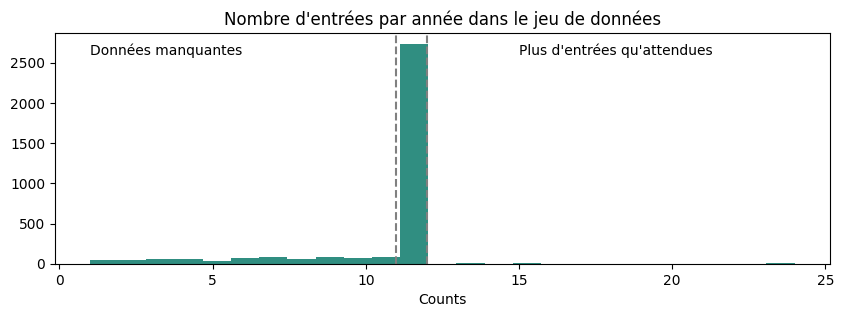

In [7]:
g = weather.groupby(["LOCAL_YEAR",'STATION_NAME', 'x', 'y']).count().reset_index()
g.LOCAL_DATE.hist(bins=25, figsize=(10,3), color='#308E81')
plt.grid(False)
plt.title("Nombre d'entrées par année dans le jeu de données")
plt.xlabel('Counts')
plt.axvline(x=11, c='grey', linestyle='--')
plt.axvline(x=12, c='grey', linestyle='--')
plt.text(x=1, y=2600, s="Données manquantes")
plt.text(x=15, y=2600, s="Plus d'entrées qu'attendues")
plt.plot()

S'il y a moins de 12 entrées, ce sont des données manquantes. Comment expliquer les cas où il y a plus de 12 entrées?

Regardons s'il y a des doublons pour la date de collecte pour la première station (Stirling).  

In [8]:
g = weather.groupby(["LOCAL_YEAR",'STATION_NAME', 'x', 'y']).count().reset_index()
stations_with_many_entries = g.loc[g.LATITUDE>12,['STATION_NAME', 'LOCAL_YEAR']].values

# Regardons s'il y a des doublons pour la date de collecte pour la première station (i=0 : STRILING)
# Qu'est-ce que vous observez ? 
i = 0
mx = weather.loc[(weather.STATION_NAME == stations_with_many_entries[i][0]) & 
                 (weather.LOCAL_YEAR == stations_with_many_entries[i][1]), :]
mx.loc[mx.LOCAL_DATE == mx.LOCAL_DATE[mx.duplicated('LOCAL_DATE')].values[0], :]

,x,y,LATITUDE,LONGITUDE,STATION_NAME,CLIMATE_IDENTIFIER,ID,LOCAL_DATE,LAST_UPDATED,PROVINCE_CODE,...,DAYS_WITH_PRECIP_GE_1MM,NORMAL_SNOWFALL,TOTAL_SNOWFALL,DAYS_WITH_VALID_SNOWFALL,SNOW_ON_GROUND_LAST_DAY,NORMAL_SUNSHINE,BRIGHT_SUNSHINE,DAYS_WITH_VALID_SUNSHINE,COOLING_DEGREE_DAYS,HEATING_DEGREE_DAYS
4027,-77.554745,44.293082,44.293,-77.555,STIRLING,6158051,27615.2007.10,2007-10-01,2014-07-31 11:54:01,ON,...,2.0,NaN,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
4028,-77.554745,44.293082,44.293,-77.555,STIRLING,6158052,46387.2007.10,2007-10-01,2014-07-31 11:54:17,ON,...,4.0,NaN,0.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN


<span style='font-size:20px'>Nous pouvons observer que le CLIMATE_IDENTIFIER a changé, pour un même nom de station et mêmes coordonnées géographiques.</span>

### À votre tour

<img style='float:right;'  src='https://drive.google.com/uc?export=view&id=1HMGzZe3dGBk9Zgpk0tKtbQarFu3WMrBK' width='100px'>  </a>

Que pouvez-vous observer d'autres ?

### Observations 

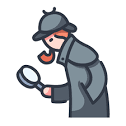


<ul style='font-size:20px'>

<li>   Les coordonnées géographiques des stations météorologiques sont indiquées par les variables x et y et par les variables LATITUDE et LONGITUDE. </li>

<li>   Chaque station est identifiée par un nom.</li>

<li>    Les données sont des données mensuelles.</li>

<li>    Les données sont associées au premier du mois.</li>

<li>   Ce ne sont pas toutes les stations qui ont 12 entrées (une entrée collectée par mois) pour chacune des variables.</li>

<li>    Certaines années ont plus de 12 entrées, il y a donc plus d'une entrée par mois.</li>
    <li>    Certaines années ont moins que 12 entrées, il manque donc des données mensuelles pour certaines variables.</li>

<ul>



<ul style='font-size:20px'>


<li>   Parmi les données, nous retrouvons entre autres:
    <ul>
    <li>  la température moyenne,
    <li>  la température maximale,
    <li> la température minimale,
    <li>  la quantité de précipitation,
    <li>  le nombre de jours d'ensoleillement,
    <li>  la quantité de neige
    </ul>    
        </li>


<li>   Il faut tenir compte de la variable `CLIMATE_IDENTIFIER` dans les opérations d'aggrégation (lorsqu'on calculera la somme et la médianne annuelle).</li>

<li>   Il n'y a pas de Région associée à chacune des stations.</li>

<li>
Il y a plusieurs stations avec des noms similaires (par exemple, ARMSTRONG (AUT) et ARMSTRONG A).
<img style='float:right;' src='https://drive.google.com/uc?export=view&id=1Ts7RPCZVfa_nC9_4psNWBQQBiwTJVEf_' height='70%'>
</li>

<ul>

## Exploration du jeu de données

<br>

<span style="font-size:20px">

Pour comprendre le jeu de données, des graphiques et des statistques sont nécessaires.

Comme les données varient dans 1) le temps et 2) l'espace, il est préférable de fixer l'une de ses variables pour rendre l'exploration plus simple.

On peut ainsi choisir une station météorologique en particulier ou une année en particulier et générer des graphiques pour cette station ou cette année d'abord.

Nous considérons toutefois chaque exemple comme un exemple indépendent.

</span>

### Exploration par station, variation des données à travers les années


[]

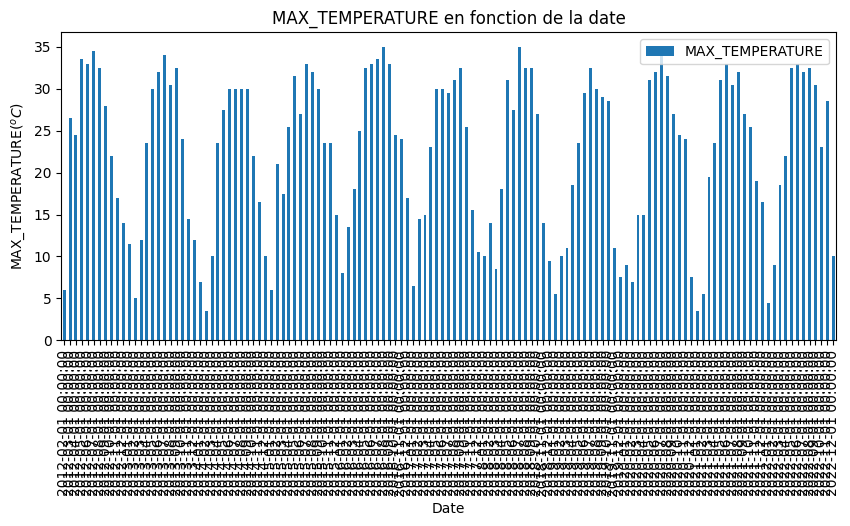

In [9]:
# Nous choisissons une station météo et une variable à représenter
station_name = "BARRIE LANDFILL" #'KENORA A'
var = 'MAX_TEMPERATURE'

mx = weather.loc[weather.STATION_NAME.str.contains(station_name), :]
mx.plot('LOCAL_DATE', var, figsize=(10,4), kind='bar')
plt.title(f'{var} en fonction de la date')
plt.ylabel(f'{var}' + '$ (^oC) $')
plt.xlabel('Date')
plt.plot()

### À votre tour 

<img style='float:right;'  src='https://drive.google.com/uc?export=view&id=1HMGzZe3dGBk9Zgpk0tKtbQarFu3WMrBK' width='100px'>  </a>

Comme nous allons vouloir réutiliser ce code, l'organisation en fonction est préférable.


In [10]:
def barplot_for_station(station_name, var, mx, figsize=(10,5)):
    mx = mx.loc[mx.STATION_NAME.str.contains(station_name), :]
    mx.plot('LOCAL_DATE', var, figsize=figsize, kind='bar')
    plt.title(f'{var} en fonction de la date')
    plt.ylabel(f'{var}' + '$ (^oC) $')
    plt.xlabel('Date')
    plt.plot()

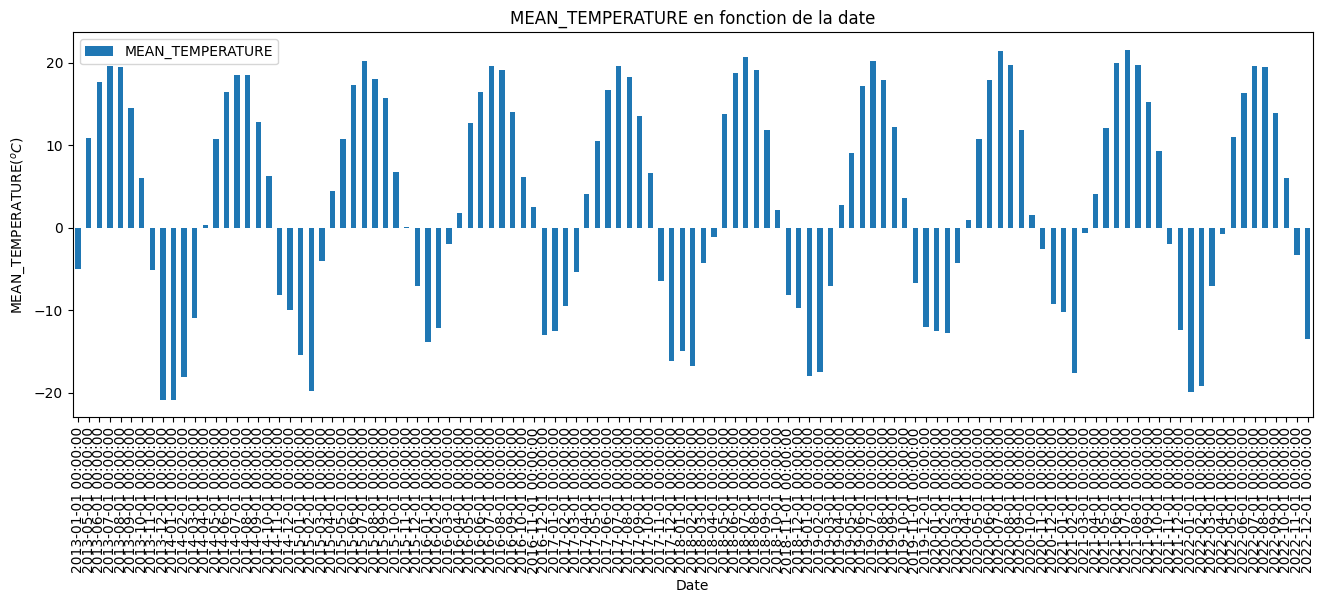

In [11]:
station_name = 'KENORA A'
barplot_for_station(station_name, var='MEAN_TEMPERATURE', mx=weather, figsize=(16,5))

Définissons quelques fonctions utiles pour la suite de l'exploration de données.

* une fonction qui crée un graphique en points présentant une variable en fonction de la date

* une fonction qui présente les dates de première et dernière lectures pour une station donnée

In [12]:
def plot_points_for_station(station_name, var, figsize=(16,5)):
    """ Crée un graphique en points de var en fonction de la date """
    mx = weather.loc[weather.STATION_NAME.str.contains(station_name), :]
    fig, ax = plt.subplots(1)
    for station in mx.STATION_NAME.unique():
        mx.loc[mx.STATION_NAME==station,:].plot('LOCAL_DATE', var, 
                                                figsize=figsize, marker='o', label=station, ax=ax, alpha=0.6)
    plt.title(F'{var} en fonction de la date')
    plt.ylabel(var)
    plt.xlabel('Date')
    plt.legend()
    plt.show()

In [13]:
def get_first_last_date(station_name):
    """ Retourne les dates de première et dernière observations pour une station donnée """
    mx = weather.loc[weather.STATION_NAME.str.contains(station_name),:]
    t = mx.loc[:,['STATION_NAME', 'x', 'y','LOCAL_DATE']]
    t0 = t.drop_duplicates('STATION_NAME', keep='first')
    t1 = t.drop_duplicates('STATION_NAME', keep='last')
    t1 = t1.drop(['x', 'y'], axis=1)
    t = t0.merge(t1, on=['STATION_NAME'])
    t.columns = ['STATION_NAME', 'x', 'y', 'FIRST_DATE', 'LAST_DATE', ]
    return t

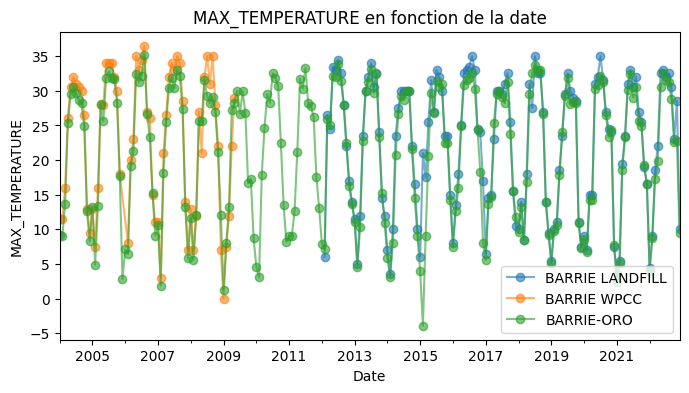

,STATION_NAME,x,y,FIRST_DATE,LAST_DATE
0,BARRIE LANDFILL,-79.736111,44.385278,2012-02-01,2022-12-01
1,BARRIE WPCC,-79.689725,44.375837,2004-01-01,2009-05-01
2,BARRIE-ORO,-79.550000,44.483333,2004-01-01,2022-12-01


In [14]:
station_name = 'BARRIE'
plot_points_for_station(station_name, 'MAX_TEMPERATURE', figsize=(8,4))
get_first_last_date(station_name)

<span style='font-size:20px;'>
Trois stations relativement proches géographiquement semblent collecter les données météorologiques de la région de Barrie.  

<ul>
    <li> La station Barrie WPCC semble avoir cessé sa collecte en 2009</li>
    <li> La station Barrie Landfill semble avoir commencé sa collecte en 2012</li>
    <li> La station Barrie-ORO est active depuis 2004</li>

</ul>
</span>

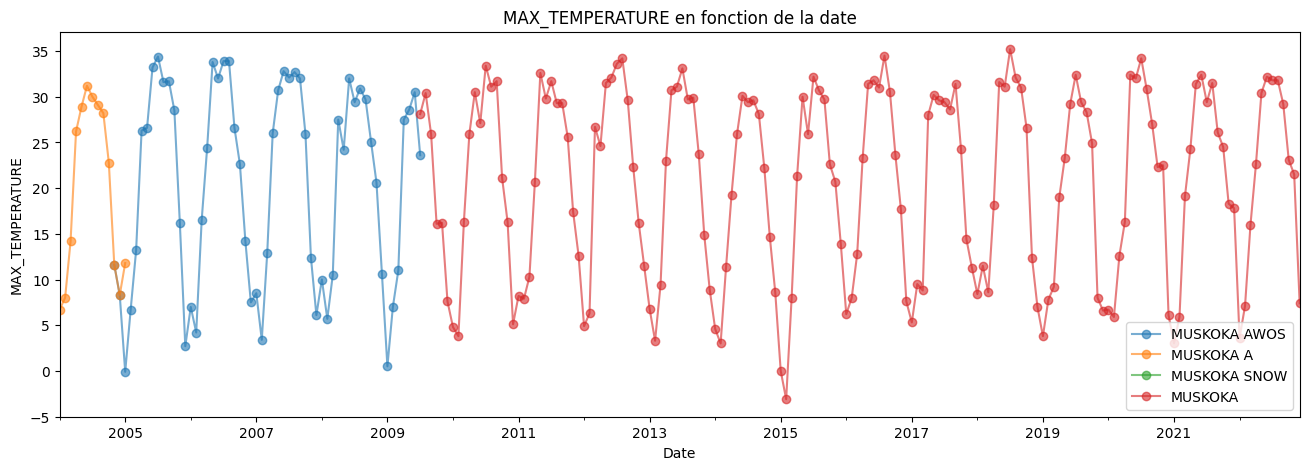

,STATION_NAME,x,y,FIRST_DATE,LAST_DATE
0,MUSKOKA AWOS,-79.303333,44.974722,2004-11-01,2009-07-01
1,MUSKOKA A,-79.300000,44.966667,2004-01-01,2015-12-01
2,MUSKOKA SNOW,-79.050000,44.983333,2016-03-01,2017-04-01
3,MUSKOKA,-79.303333,44.974722,2009-07-01,2022-12-01


In [15]:
station_name = 'MUSKOKA'
var = 'MAX_TEMPERATURE'
plot_points_for_station(station_name, var)
get_first_last_date(station_name)

Pourquoi ne voit-on pas MUSKOKA SNOW sur le graphique ?

In [16]:
weather.loc[weather.STATION_NAME=='MUSKOKA SNOW',['LOCAL_DATE', 'MAX_TEMPERATURE']]

,LOCAL_DATE,MAX_TEMPERATURE
8053,2016-03-01,NaN
8054,2016-04-01,NaN
8055,2016-11-01,NaN
8056,2016-12-01,NaN
8057,2017-01-01,NaN
8058,2017-02-01,NaN
8059,2017-03-01,NaN
8060,2017-04-01,NaN


In [17]:
# Nombre d'entrées pour la station et les variables spécfiées
station_name = 'MUSKOKA'
mx = weather.loc[weather.STATION_NAME.str.contains(station_name),:]
mx.groupby('STATION_NAME').count()[['MAX_TEMPERATURE','DAYS_WITH_PRECIP_GE_1MM', 'TOTAL_SNOWFALL' ]]

,MAX_TEMPERATURE,DAYS_WITH_PRECIP_GE_1MM,TOTAL_SNOWFALL
STATION_NAME,,,
MUSKOKA,162,162,0
MUSKOKA A,13,78,78
MUSKOKA AWOS,57,57,2
MUSKOKA SNOW,0,8,8


### À votre tour 

<img style='float:right;'  src='https://drive.google.com/uc?export=view&id=1HMGzZe3dGBk9Zgpk0tKtbQarFu3WMrBK' width='100px'>  </a>


Explorer les données de d'autres stations météorologiques avec les fonctions ou avec vos propres graphiques.


In [18]:
station_name = 'RAWSON LAKE'
missing = weather.loc[weather.STATION_NAME==station_name,:].isnull().sum(0).T
print(F'Certaines variables sont manquantes pour la station {station_name} ')
missing.loc[missing!=0]

Certaines variables sont manquantes pour la station RAWSON LAKE 


NORMAL_SNOWFALL              33
TOTAL_SNOWFALL                2
SNOW_ON_GROUND_LAST_DAY      14
BRIGHT_SUNSHINE             178
DAYS_WITH_VALID_SUNSHINE    178
dtype: int64

#### Exploration de plusieurs variables

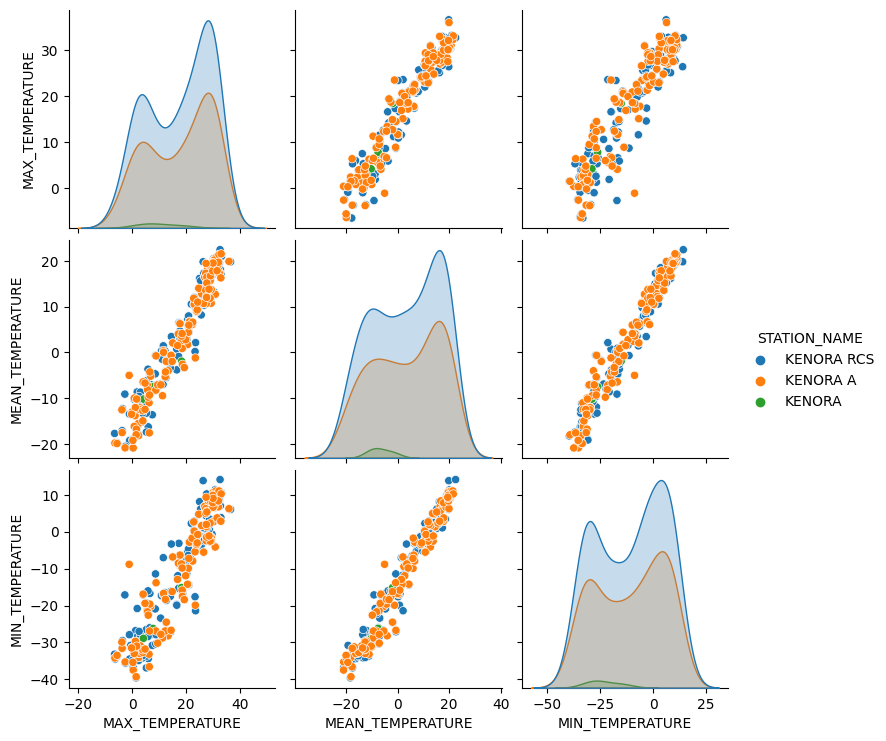

In [19]:
station_name = 'KENORA'
cols = ["STATION_NAME", "MAX_TEMPERATURE", 'MEAN_TEMPERATURE', 'MIN_TEMPERATURE']
mx = weather.loc[(weather.STATION_NAME.str.contains(station_name)),cols]
sns.pairplot(mx, hue="STATION_NAME")
plt.show()

[]

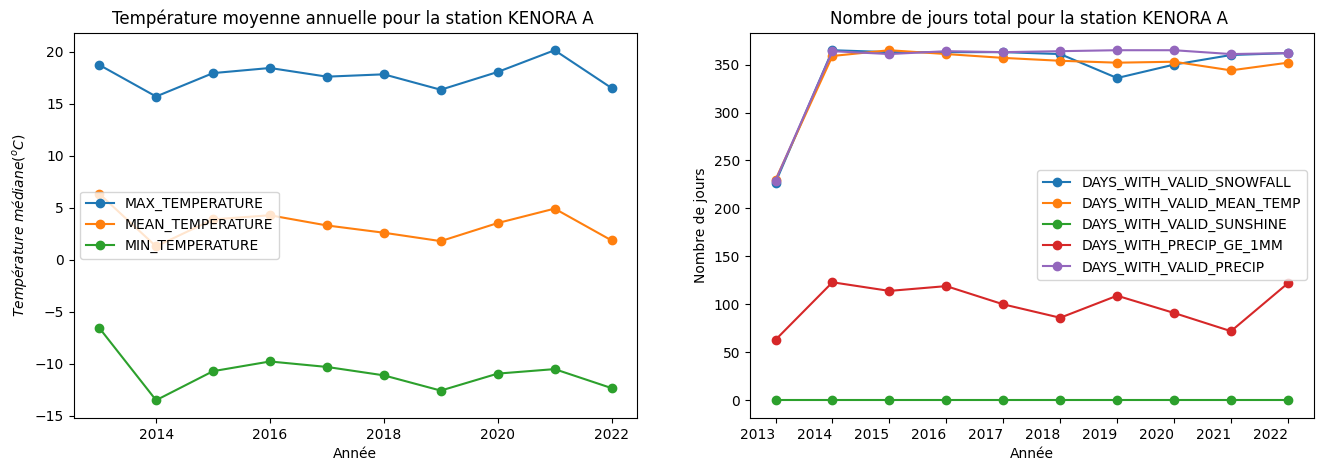

In [20]:
station_name = 'KENORA A'
mx = weather.loc[weather.STATION_NAME.str.contains(station_name), :]

fig, axs = plt.subplots(1,2, figsize=(16,5))
ax1, ax2 = axs
cols = ["MAX_TEMPERATURE", 'MEAN_TEMPERATURE', 'MIN_TEMPERATURE']

g = mx.groupby("LOCAL_YEAR")[cols].mean()
g.plot(marker='o', ax=ax1)
plt.xticks(g.index, rotation=30, ha='right')
ax1.legend(loc='center left')
ax1.set_ylabel('$Température\ médiane(^oC)$')
ax1.set_xlabel('Année')
ax1.set_title(F'Température moyenne annuelle pour la station {station_name} ')

cols = ["DAYS_WITH_VALID_SNOWFALL", 'DAYS_WITH_VALID_MEAN_TEMP', 'DAYS_WITH_VALID_SUNSHINE','DAYS_WITH_PRECIP_GE_1MM', 'DAYS_WITH_VALID_PRECIP']
g = mx.groupby("LOCAL_YEAR")[cols].sum()
g.plot(marker='o', ax=ax2)
ax2.legend(loc='center right')
ax2.set_ylabel('Nombre de jours')
ax2.set_xlabel('Année')
ax2.set_title(F'Nombre de jours total pour la station {station_name} ')
plt.plot()

In [21]:
# Pouvez-vous créer une fonction à partir du code ci-dessus?
def plot_vars_by_years():
    pass

## Exploration des données d'une année parmi les régions

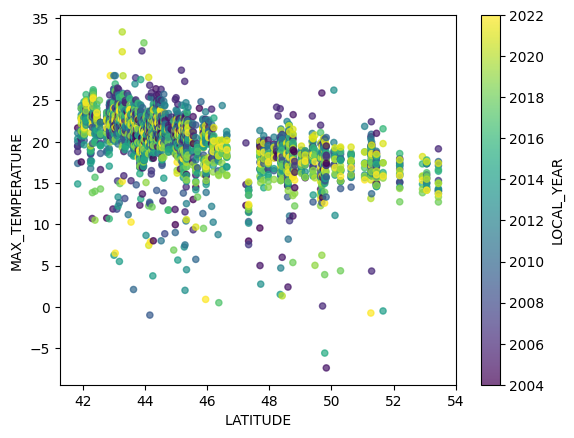

In [22]:
cols = ['LOCAL_YEAR', 'LATITUDE','MAX_TEMPERATURE', 'MIN_TEMPERATURE', 'MEAN_TEMPERATURE']
g = weather.loc[:,cols].groupby(['LATITUDE', 'LOCAL_YEAR']).mean().reset_index()
g.plot.scatter(x='LATITUDE', y='MAX_TEMPERATURE', c='LOCAL_YEAR', colormap='viridis', alpha=0.7)
plt.show()

* La température minimum diminue avec l'augmentation de la latitude, ce qui est attendu.  

* Visuellement, on ne voit pas de tendance liée à l'année.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Latitude_of_the_Earth_fr.svg/langfr-300px-Latitude_of_the_Earth_fr.svg.png' style='float:right;'/>

Nous avons des données mensuelles que nous devrons transformer en données annuelles.  à

Quelle stratégie adopter?

Cela dépend du type de variable.

/var/folders/jc/f6v43psn1vs2wsxdh3svtxfh0000gn/T/ipykernel_65408/1267265568.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = mx.groupby(['LOCAL_YEAR']).mean().reset_index()


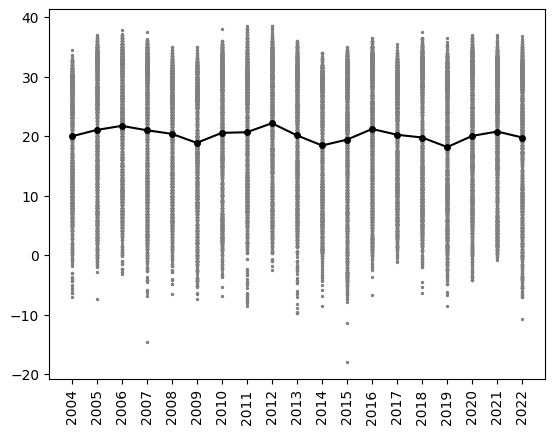

In [23]:
mx = weather#.loc[(weather.LOCAL_MONTH==7),:]
plt.scatter(mx.LOCAL_YEAR, mx.MAX_TEMPERATURE, marker='o', s=2, c='grey')

g = mx.groupby(['LOCAL_YEAR']).mean().reset_index()
plt.plot(g.LOCAL_YEAR, g.MAX_TEMPERATURE, marker='o', c='black', markersize=4)
plt.xticks(g.LOCAL_YEAR, rotation=90)
plt.show()

/var/folders/jc/f6v43psn1vs2wsxdh3svtxfh0000gn/T/ipykernel_65408/422528545.py:13: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['CLIMATE_IDENTIFIER', 'ENG_PROVINCE_NAME', 'FRE_PROVINCE_NAME', 'ID',
       'LAST_UPDATED', 'LOCAL_DATE', 'PROVINCE_CODE', 'STATION_NAME'],
      dtype='object')
  rdata = data.rolling(12, center=True).mean()


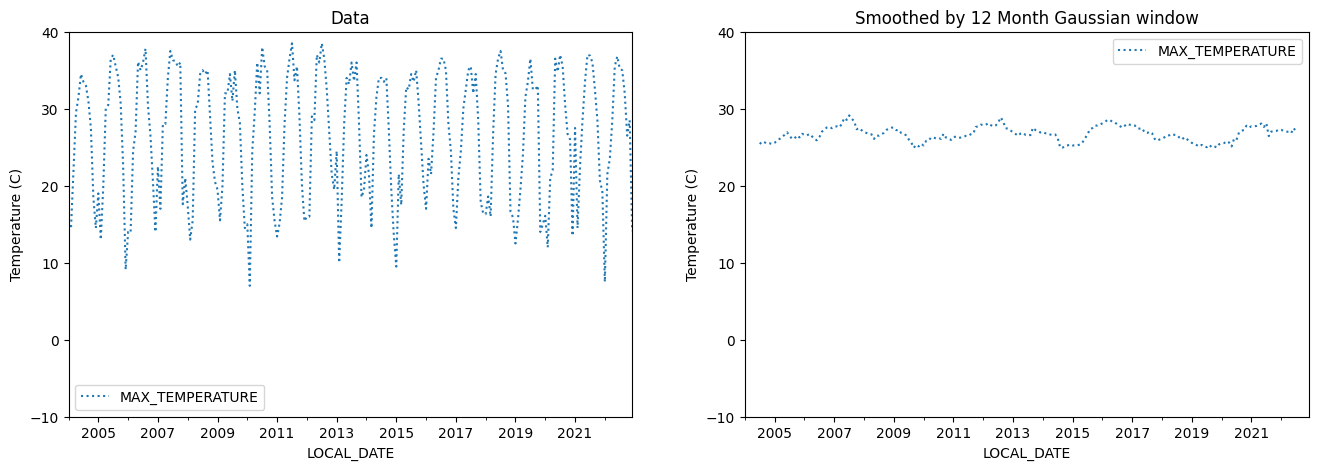

In [24]:
tmp = weather.copy()
tmp.index = tmp.LOCAL_DATE
data = tmp.resample('M').max()

vars = ['MAX_TEMPERATURE']

fig, axs= plt.subplots(1, 2, figsize=(16,5))
data[vars].plot(style=[':', '--', '-'], ax=axs[0])
axs[0].set_title('Data')
axs[0].set_ylabel('Temperature (C)')
axs[0].set_ylim(-10, 40)

rdata = data.rolling(12, center=True).mean()
rdata[vars].plot(style=[':', '--', '-'], ax=axs[1])
axs[1].set_title('Smoothed by 12 Month Gaussian window')
axs[1].set_ylabel('Temperature (C)')
axs[1].set_ylim(-10, 40)
plt.show()

### À votre tour 

<img style='float:right;'  src='https://drive.google.com/uc?export=view&id=1HMGzZe3dGBk9Zgpk0tKtbQarFu3WMrBK' width='100px'>  </a>

Tester différentes visualisations et déterminer laquelle est la plus utile.  

C'est facile de générer beaucoup de graphiques. C'est plus difficile de déterminer lesquels sont utiles et quel est le message que l'on veut communiquer avec ces graphiques.

## Conversion des données mensuelles en données annuelles



Nous avons besoin des données météorologiques annuelles.  Les données que nous avons récupérées sont des données mensuelles. Il faut fonc convertir les données mensuelles en données annuelles.
Pour certaines données, il est préférable de faire une somme, pour d'autres il est préférable de prendre la médiane ou la moyenne.



### À votre tour 

<img style='float:right;'  src='https://drive.google.com/uc?export=view&id=1HMGzZe3dGBk9Zgpk0tKtbQarFu3WMrBK' width='100px'>  </a>

D'après vous, quelles fonctions doit-on utiliser pour chacune des variables suivantes :

* TOTAL_PRECIPITATION ?
* MIN_TEMPERATURE ?
* DAYS_WITH_PRECIP_GE_1MM ?
* MAX_TEMPERATURE ?
* MEAN_TEMPERATURE ?

Une fois le type d'aggrégation défini pour les variables qui nous intéressent (somme, médiane, moyenne), nous pouvons faire la conversion de mensuelle à annuelle.

Nous ne garderons que les STATIONS qui ont collecté des données pendant les 12 mois pour nos variables d'intérêt.

In [25]:
cols = ['LOCAL_YEAR', 'STATION_NAME', 'x', 'y', 'LATITUDE', 'LONGITUDE', 'CLIMATE_IDENTIFIER']

cols_median = ['MEAN_TEMPERATURE'] #,'MIN_TEMPERATURE'] #, 'MAX_TEMPERATURE' ]
cols_sum = ['TOTAL_PRECIPITATION', 'DAYS_WITH_VALID_PRECIP',
            'DAYS_WITH_PRECIP_GE_1MM', 'TOTAL_SNOWFALL',
            'DAYS_WITH_VALID_SNOWFALL', 'DAYS_WITH_VALID_SUNSHINE',]
cols_max = ['MAX_TEMPERATURE']
cols_min = ['MIN_TEMPERATURE']

w = weather.loc[:, cols + cols_median + cols_sum + cols_max + cols_min]
g = w.groupby(cols).count().reset_index()
keep = g.loc[(g.TOTAL_PRECIPITATION==12) & (g.MAX_TEMPERATURE==12) &
             (g.MEAN_TEMPERATURE==12) & (g.DAYS_WITH_VALID_PRECIP==12) ].index

In [26]:
g = w.groupby(cols)

w_sum = g.sum().reset_index().loc[keep, cols + cols_sum]
w_median = g.median().reset_index().loc[keep, cols_median]
w_max = g.max().reset_index().loc[keep, cols_max]
w_min = g.min().reset_index().loc[keep, cols_min]

w = pd.concat([w_sum, w_median, w_max, w_min], ignore_index=True, axis=1)
w.columns = cols + cols_sum + cols_median + cols_max + cols_min

In [27]:
w.head(10)

,LOCAL_YEAR,STATION_NAME,x,y,LATITUDE,LONGITUDE,CLIMATE_IDENTIFIER,TOTAL_PRECIPITATION,DAYS_WITH_VALID_PRECIP,DAYS_WITH_PRECIP_GE_1MM,TOTAL_SNOWFALL,DAYS_WITH_VALID_SNOWFALL,DAYS_WITH_VALID_SUNSHINE,MEAN_TEMPERATURE,MAX_TEMPERATURE,MIN_TEMPERATURE
0,2004,ALBERTON,-80.050000,43.183333,43.183,-80.050,6150060,803.3,366.0,118.0,94.0,366.0,0.0,8.925161,32.0,-27.0
4,2004,ALLISTON NELSON,-79.872247,44.151397,44.151,-79.872,6110218,860.2,366.0,144.0,186.0,366.0,0.0,8.432473,32.0,-30.0
5,2004,AMHERSTBURG,-83.094463,42.103358,42.103,-83.094,6130257,1053.2,366.0,126.0,83.8,366.0,0.0,10.800269,32.0,-22.0
6,2004,APPLETON,-76.112805,45.185840,45.186,-76.113,6100285,833.6,366.0,113.0,118.8,366.0,0.0,7.232634,30.0,-32.0
8,2004,ATIKOKAN (AUT),-91.628056,48.761111,48.761,-91.628,6020LPQ,658.8,343.0,103.0,4.6,13.0,0.0,3.959023,30.7,-39.5
11,2004,AVONMORE,-74.970840,45.170012,45.170,-74.971,6100398,1093.8,366.0,141.0,208.3,366.0,0.0,7.234892,31.0,-34.0
14,2004,BANCROFT AUTO,-77.878889,45.071389,45.071,-77.879,616I001,886.8,359.0,111.0,0.0,0.0,0.0,5.397957,30.1,-37.8
15,2004,BARRIE WPCC,-79.689725,44.375837,44.376,-79.690,6110557,988.3,366.0,139.0,311.5,366.0,0.0,7.562527,32.0,-33.0
16,2004,BARRIE-ORO,-79.550000,44.483333,44.483,-79.550,6117700,866.1,365.0,125.0,0.0,0.0,0.0,6.470323,30.5,-35.4
17,2004,BARWICK,-93.966667,48.633333,48.633,-93.967,6020559,889.8,366.0,123.0,144.1,366.0,0.0,5.568333,31.0,-38.5


In [28]:
w.to_csv('weather_yearly_v1.csv')